In [2]:
%pylab inline

import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Normal Distribution Example

mean: 13.936575654964875 std: 1.4823475301300668


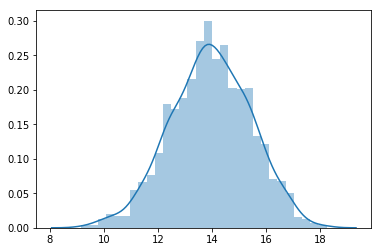

In [26]:
samples = stats.norm.rvs(loc=2, scale=1.5, size=1500) + 12 # 랜덤 생성
mean, std = stats.norm.fit(samples)

print('mean:', mean, 'std:', std)
sns.distplot(samples, bins=30)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


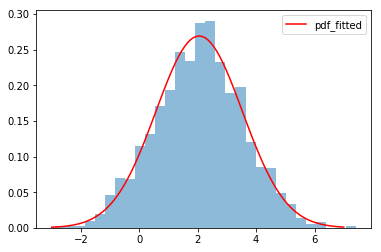

In [13]:
x = np.linspace(-3, 7, 100) # 위의 평균과 standard deviation을 고려해서 생성
pdf_fitted = stats.norm.pdf(x, loc=mean, scale=std)
pdf = stats.norm.pdf(x)

plot(x, pdf_fitted, 'r-', label='pdf_fitted')
hist(samples, bins=30, normed=1, alpha=.5)
legend()

Seaborn을 사용해서 plotting 하면 다음과 같습니다.

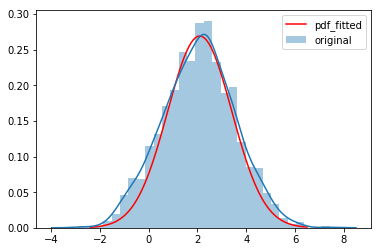

In [15]:
def estimate_distribution(data, dist_name, x_size=100):
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    
    mean = params[-2]
    std = params[-1]
    
    n = data.shape[0]
    x = np.linspace(mean-std*3, mean+std*3, x_size)

    fitted_pdf = dist.pdf(x, *params[:-2], loc=mean, scale=std) 
    return x, params, fitted_pdf
x, params, fitted_pdf = estimate_distribution(samples, 'norm')

sns.lineplot(x, pdf_fitted, color='red', label='pdf_fitted')
sns.distplot(samples, bins=30, norm_hist=True, label='original')
legend()

## Beta Distribution

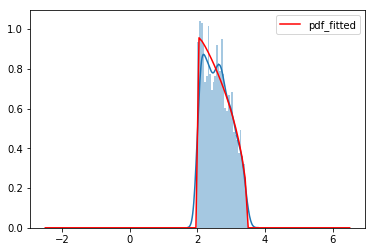

In [40]:
samples = stats.beta.rvs(1, 1.5, loc=2, scale=1.5, size=1500) # 랜덤 생성

x, params, fitted_pdf = estimate_distribution(samples, 'beta')

sns.distplot(samples, bins=30, norm_hist=True)
sns.lineplot(x, fitted_pdf, color='red', label='pdf_fitted')

## Gamma Distribution

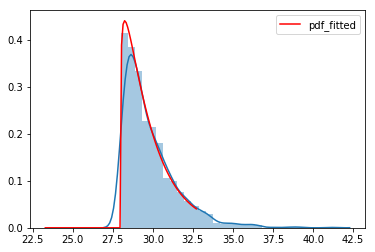

In [62]:
samples = stats.gamma.rvs(1.2 ,loc=4, scale=1.5, size=1500) + 24  # 랜덤 생성

x, params, fitted_pdf = estimate_distribution(samples, 'gamma')

sns.distplot(samples, bins=30, norm_hist=False)
sns.lineplot(x, fitted_pdf, color='red', label='pdf_fitted')

 ## Supported Distributions in Scipy
 ```
 'alpha',
 'anglit',
 'arcsine',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponweib',
 'exponpow',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_r',
 'frechet_l',
 'genlogistic',
 'genpareto',
 'genexpon',
 'genextreme',
 'gausshyper',
 'gamma',
 'gengamma',
 'genhalflogistic',
 'gilbrat',
 'gompertz',
 'gumbel_r',
 'gumbel_l',
 'halfcauchy',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'ksone',
 'kstwobign',
 'laplace',
 'logistic',
 'loggamma',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'nakagami',
 'ncx2',
 'ncf',
 'nct',
 'norm',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rdist',
 'reciprocal',
 'rayleigh',
 'rice',
 'recipinvgauss',
 'semicircular',
 't',
 'triang',
 'truncexpon',
 'truncnorm',
 'tukeylambda',
 'uniform',
 'vonmises',
 'wald',
 'weibull_min',
 'weibull_max',
 'wrapcauchy'
 ```